In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pysindy as ps
from scipy.integrate import odeint
from math import pi
from pysindy.differentiation import FiniteDifference
fd = FiniteDifference(order=2, d=1)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import glob
from sklearn.metrics import mean_absolute_error

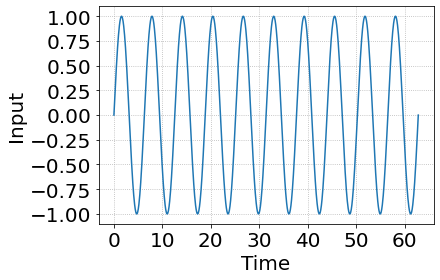

In [2]:
plt.grid(linestyle='dotted')
t = np.linspace(0,20*pi,1000)
x = np.sin(t)
plt.plot(t, x)
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Input', fontsize = 20)
#plt.legend(['Actual function' , 'Learned function', 'Training Data'], prop={'size': 16})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("Results/test3_input.pdf", dpi = 3000, bbox_inches='tight')

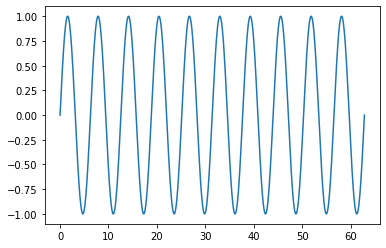

In [3]:
plt.plot(t,x)

In [4]:
dx = fd._differentiate(x, t)

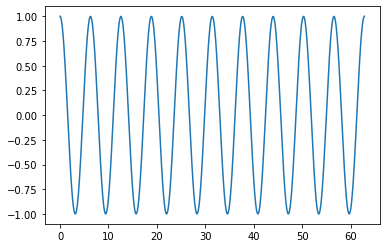

In [5]:
plt.plot(t,dx)

In [6]:
mdx = np.abs(dx)

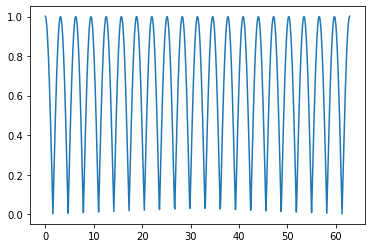

In [7]:
plt.plot(t, mdx)

In [27]:
def model(y, t):
    dydt = 0.5*np.cos(t) - 5*y*np.abs(np.cos(t)) + 3.5*(np.sin(t))*np.abs(np.cos(t))
    return dydt

In [28]:
y0 = 0
y = odeint(model, y0, t)

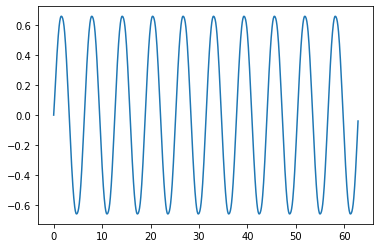

In [29]:
plt.plot(t,y)

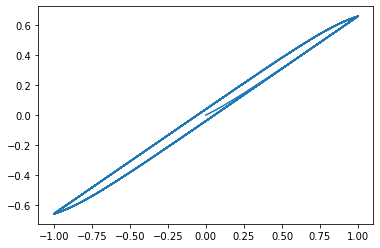

In [30]:
plt.plot(x, y)

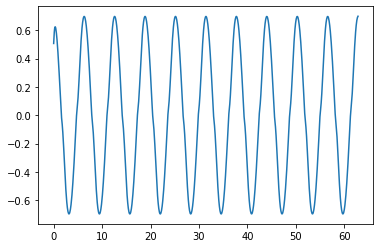

In [31]:
dy = fd._differentiate(y, t)
plt.plot(t, dy)

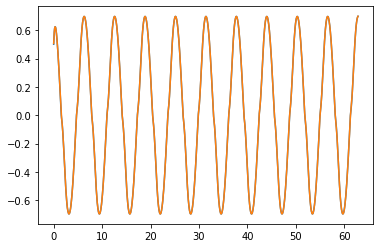

In [33]:
y = y.reshape(-1,)
dy = dy.reshape(-1,)
t1 = dx
t2 = mdx*y
t3 = x*mdx
terms = 0.5*t1-5*t2+3.5*t3
plt.plot(t,terms)
plt.plot(t, dy)

In [34]:
X = np.stack((y, x, dx, mdx), axis=-1)

In [38]:
from pysindy.optimizers import STLSQ
opt = STLSQ(threshold=0.3)
model = ps.SINDy(optimizer=opt)
model.fit(X,t)
model.print()

(x0)' = 0.501 x2 + -4.964 x0 x3 + 3.475 x1 x3
(x1)' = 1.000 x2
(x2)' = -0.999 x1
(x3)' = 390.595 1 + 5.272 x3 + 1191.223 x0^2 + -1674.910 x0 x1 + 123.022 x0 x2 + 195.505 x1^2 + -87.606 x1 x2 + -196.667 x2^2 + -196.667 x3^2


In [39]:
c1 = 0.501
c2 = -4.964
c3 = 3.475
def test_model(y, t):
    dydt = c1*np.cos(t) + c2*y*np.abs(np.cos(t)) + c3*(np.sin(t))*np.abs(np.cos(t))
    return dydt

In [40]:
ytest_0 = 0
y_test = odeint(test_model, ytest_0, t)

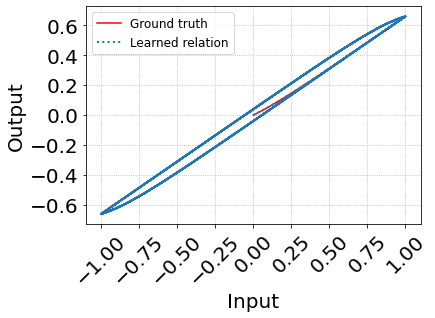

In [41]:
plt.grid(linestyle='dotted')
plt.plot(x, y, 'r')
plt.plot(x, y_test, linewidth=2, linestyle=':')
plt.xlabel('Input', fontsize = 20)
plt.ylabel('Output', fontsize = 20)
plt.legend(['Ground truth' , 'Learned relation'], loc='upper left', prop={'size': 12})
plt.xticks(fontsize=20, rotation='45')
plt.yticks(fontsize=20)
plt.savefig("Results/test3_inputvsOutput.pdf", dpi = 3000, bbox_inches='tight')

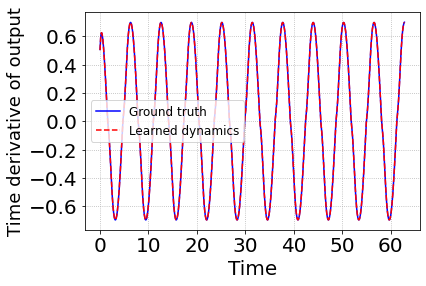

In [42]:
test = c1*t1+c2*t2+c3*t3
plt.plot(t,dy, 'b')
plt.plot(t,test, '--r')
plt.grid(linestyle='dotted')
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Time derivative of output', fontsize = 18)
plt.legend(['Ground truth' , 'Learned dynamics'], prop={'size': 12})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("Results/test3_Output.pdf", dpi = 3000, bbox_inches='tight')

In [43]:
y = y.reshape(-1,1)
# Compute the relative L2 error norm (generalization error)
relative_error_test = np.mean((y_test - y)**2)/np.mean(y**2)
print("Relative Error Test: ", relative_error_test*100, "%")

Relative Error Test:  3.176879728091236e-06 %


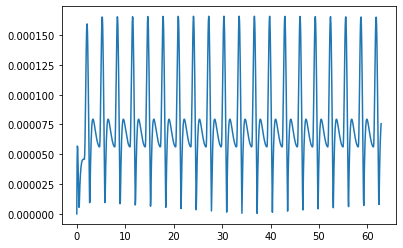

In [44]:
err_t = np.abs(y-y_test)
plt.plot(t, err_t)

In [22]:
x.shape

(1000,)

In [23]:
xx = x[::5]
xx.shape

(200,)